In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import csv

In [53]:
def fractal_sorter(fractal_data):
    #convert each set of data to numpy array
    rawNumParticles = fractal_data.numParticles.to_numpy()
    rawClusterRadius = fractal_data.clusterRadius.to_numpy()


    #array of indexes of where a new fractal starts
    sliceNum = 10
    where_isTen = np.where(rawNumParticles == sliceNum)

    #initialise empty array to store each fractal
    previousIndex = 0
    slicedNumParticles = []
    slicedClusterRadius = []

    #slices fractal data up
    for i in where_isTen[0]:

        temp_numParticles = rawNumParticles[previousIndex: i]
        temp_ClusterRadius = rawClusterRadius[previousIndex: i]
        
        slicedNumParticles.append(temp_numParticles)
        slicedClusterRadius.append(temp_ClusterRadius)

        previousIndex = i
        
    #appends final fractal data
    slicedNumParticles.append(rawNumParticles[previousIndex:])
    slicedClusterRadius.append(rawClusterRadius[previousIndex:])

    #gets rid of 0th row that was empty
    slicedNumParticles = slicedNumParticles[1:]
    slicedClusterRadius = slicedClusterRadius[1:]
    
    return slicedNumParticles, slicedClusterRadius

def getAverage(particleList, radiusList):
    numFractals = len(particleList)
    numValues = len(radiusList[0])
    meanSizes = np.zeros(numValues)
    meanSquareSizes = np.zeros(numValues)
    SizeErrors = np.zeros(numValues)
    ln_errors = []
    
    #calculates average clusterRadius
    for i in range(numFractals):
        for j in range(numValues):
            meanSizes[j] += radiusList[i][j]/numFractals
            meanSquareSizes[j] += (radiusList[i][j]**2)/numFractals

    for k in range(numValues):
        SizeErrors[k] += (1/np.sqrt(numFractals-1)) * np.sqrt(meanSquareSizes[k] - meanSizes[k]**2)
        #print(SizeErrors[k])
        
    for l in range(numValues):
        ln_errors.append(SizeErrors[l] / meanSizes[l])
            
    return meanSizes, ln_errors

#create line of best fits to calculate gradient
def best_fit(x, slope , intercept):
    return slope*x + intercept

In [54]:
prob1_data = pd.DataFrame(pd.read_csv("prob_data/prob1_data.csv", dtype=np.float64))

#probability = 1 data processed
p1_numParticles = fractal_sorter(prob1_data)[0]
p1_clusterRadius = fractal_sorter(prob1_data)[1]
p1_meanSize = getAverage(p1_numParticles, p1_clusterRadius)[0]

p1_ln_numParticles = np.log(p1_numParticles)[0]
p1_ln_clusterRadius = np.log(p1_meanSize)
p1_clusterRadius_err = getAverage(p1_numParticles, p1_clusterRadius)[1]

p1_data = [p1_ln_numParticles, p1_ln_clusterRadius, p1_clusterRadius_err]


In [55]:
prob075_data = pd.DataFrame(pd.read_csv("prob_data/prob075_data.csv", dtype=np.float64))

#probability = 75% data processed
p075_numParticles = fractal_sorter(prob075_data)[0]
p075_clusterRadius = fractal_sorter(prob075_data)[1]
p075_meanSize = getAverage(p075_numParticles, p075_clusterRadius)[0]

p075_ln_numParticles = np.log(p075_numParticles)[0]
p075_ln_clusterRadius = np.log(p075_meanSize)
p075_clusterRadius_err = getAverage(p075_numParticles, p075_clusterRadius)[1]

p075_data = [p075_ln_numParticles, p075_ln_clusterRadius, p075_clusterRadius_err]

In [56]:
prob050_data = pd.DataFrame(pd.read_csv("prob_data/prob05_data.csv", dtype=np.float64))

#probability = 50% data processed
p050_numParticles = fractal_sorter(prob050_data)[0]
p050_clusterRadius = fractal_sorter(prob050_data)[1]
p050_meanSize = getAverage(p050_numParticles, p050_clusterRadius)[0]

p050_ln_numParticles = np.log(p050_numParticles)[0]
p050_ln_clusterRadius = np.log(p050_meanSize)
p050_clusterRadius_err = getAverage(p050_numParticles, p050_clusterRadius)[1]

p050_data = [p050_ln_numParticles, p050_ln_clusterRadius, p050_clusterRadius_err]

In [57]:
prob025_data = pd.DataFrame(pd.read_csv("prob_data/prob025_data.csv", dtype=np.float64))

#probability = 50% data processed
p025_numParticles = fractal_sorter(prob025_data)[0]
p025_clusterRadius = fractal_sorter(prob025_data)[1]
p025_meanSize = getAverage(p025_numParticles, p025_clusterRadius)[0]

p025_ln_numParticles = np.log(p025_numParticles)[0]
p025_ln_clusterRadius = np.log(p025_meanSize)
p025_clusterRadius_err = getAverage(p025_numParticles, p025_clusterRadius)[1]

p025_data = [p025_ln_numParticles, p025_ln_clusterRadius, p025_clusterRadius_err]

In [58]:
prob005_data = pd.DataFrame(pd.read_csv("prob_data/prob005_data.csv", dtype=np.float64))

#probability = 50% data processed
p005_numParticles = fractal_sorter(prob005_data)[0]
p005_clusterRadius = fractal_sorter(prob005_data)[1]
p005_meanSize = getAverage(p005_numParticles, p005_clusterRadius)[0]

p005_ln_numParticles = np.log(p005_numParticles)[0]
p005_ln_clusterRadius = np.log(p005_meanSize)
p005_clusterRadius_err = getAverage(p005_numParticles, p005_clusterRadius)[1]

p005_data = [p005_ln_numParticles, p005_ln_clusterRadius, p005_clusterRadius_err]

In [59]:
prob001_data = pd.DataFrame(pd.read_csv("prob_data/prob001_data.csv", dtype=np.float64))

#probability = 50% data processed
p001_numParticles = fractal_sorter(prob001_data)[0]
p001_clusterRadius = fractal_sorter(prob001_data)[1]
p001_meanSize = getAverage(p001_numParticles, p001_clusterRadius)[0]

p001_ln_numParticles = np.log(p001_numParticles)[0]
p001_ln_clusterRadius = np.log(p001_meanSize)
p001_clusterRadius_err = getAverage(p001_numParticles, p001_clusterRadius)[1]

p001_data = [p001_ln_numParticles, p001_ln_clusterRadius, p001_clusterRadius_err]

In [60]:
prob0875_data = pd.DataFrame(pd.read_csv("prob_data/prob0875_data.csv", dtype=np.float64))

#probability = 50% data processed
p0875_numParticles = fractal_sorter(prob0875_data)[0]
p0875_clusterRadius = fractal_sorter(prob0875_data)[1]
p0875_meanSize = getAverage(p0875_numParticles, p0875_clusterRadius)[0]

p0875_ln_numParticles = np.log(p0875_numParticles)[0]
p0875_ln_clusterRadius = np.log(p0875_meanSize)
p0875_clusterRadius_err = getAverage(p0875_numParticles, p0875_clusterRadius)[1]

p0875_data = [p0875_ln_numParticles, p0875_ln_clusterRadius, p0875_clusterRadius_err]

In [61]:
prob0625_data = pd.DataFrame(pd.read_csv("prob_data/prob0625_data.csv", dtype=np.float64))

#probability = 50% data processed
p0625_numParticles = fractal_sorter(prob0625_data)[0]
p0625_clusterRadius = fractal_sorter(prob0625_data)[1]
p0625_meanSize = getAverage(p0625_numParticles, p0625_clusterRadius)[0]

p0625_ln_numParticles = np.log(p0625_numParticles)[0]
p0625_ln_clusterRadius = np.log(p0625_meanSize)
p0625_clusterRadius_err = getAverage(p0625_numParticles, p0625_clusterRadius)[1]

p0625_data = [p0625_ln_numParticles, p0625_ln_clusterRadius, p0625_clusterRadius_err]

In [62]:
prob0375_data = pd.DataFrame(pd.read_csv("prob_data/prob0375_data.csv", dtype=np.float64))

#probability = 50% data processed
p0375_numParticles = fractal_sorter(prob0375_data)[0]
p0375_clusterRadius = fractal_sorter(prob0375_data)[1]
p0375_meanSize = getAverage(p0375_numParticles, p0375_clusterRadius)[0]

p0375_ln_numParticles = np.log(p0375_numParticles)[0]
p0375_ln_clusterRadius = np.log(p0375_meanSize)
p0375_clusterRadius_err = getAverage(p0375_numParticles, p0375_clusterRadius)[1]

p0375_data = [p0375_ln_numParticles, p0375_ln_clusterRadius, p0375_clusterRadius_err]

In [63]:
prob015_data = pd.DataFrame(pd.read_csv("prob_data/prob015_data.csv", dtype=np.float64))

#probability = 50% data processed
p015_numParticles = fractal_sorter(prob015_data)[0]
p015_clusterRadius = fractal_sorter(prob015_data)[1]
p015_meanSize = getAverage(p015_numParticles, p015_clusterRadius)[0]

p015_ln_numParticles = np.log(p015_numParticles)[0]
p015_ln_clusterRadius = np.log(p015_meanSize)
p015_clusterRadius_err = getAverage(p015_numParticles, p015_clusterRadius)[1]

p015_data = [p015_ln_numParticles, p015_ln_clusterRadius, p015_clusterRadius_err]

In [64]:
prob002_data = pd.DataFrame(pd.read_csv("prob_data/prob002_data.csv", dtype=np.float64))

#probability = 50% data processed
p002_numParticles = fractal_sorter(prob002_data)[0]
p002_clusterRadius = fractal_sorter(prob002_data)[1]
p002_meanSize = getAverage(p002_numParticles, p002_clusterRadius)[0]

p002_ln_numParticles = np.log(p002_numParticles)[0]
p002_ln_clusterRadius = np.log(p002_meanSize)
p002_clusterRadius_err = getAverage(p002_numParticles, p002_clusterRadius)[1]

p002_data = [p002_ln_numParticles, p002_ln_clusterRadius, p002_clusterRadius_err]

# add in new data

In [65]:
prob009_data = pd.DataFrame(pd.read_csv("prob_data/prob009_data.csv", dtype=np.float64))

#probability = 50% data processed
p009_numParticles = fractal_sorter(prob009_data)[0]
p009_clusterRadius = fractal_sorter(prob009_data)[1]
p009_meanSize = getAverage(p009_numParticles, p009_clusterRadius)[0]

p009_ln_numParticles = np.log(p009_numParticles)[0]
p009_ln_clusterRadius = np.log(p009_meanSize)
p009_clusterRadius_err = getAverage(p009_numParticles, p009_clusterRadius)[1]

p009_data = [p009_ln_numParticles, p009_ln_clusterRadius, p009_clusterRadius_err]

In [66]:
prob008_data = pd.DataFrame(pd.read_csv("prob_data/prob008_data.csv", dtype=np.float64))

#probability = 50% data processed
p008_numParticles = fractal_sorter(prob008_data)[0]
p008_clusterRadius = fractal_sorter(prob008_data)[1]
p008_meanSize = getAverage(p008_numParticles, p008_clusterRadius)[0]

p008_ln_numParticles = np.log(p008_numParticles)[0]
p008_ln_clusterRadius = np.log(p008_meanSize)
p008_clusterRadius_err = getAverage(p008_numParticles, p008_clusterRadius)[1]

p008_data = [p008_ln_numParticles, p008_ln_clusterRadius, p008_clusterRadius_err]

In [67]:
prob007_data = pd.DataFrame(pd.read_csv("prob_data/prob007_data.csv", dtype=np.float64))

#probability = 50% data processed
p007_numParticles = fractal_sorter(prob007_data)[0]
p007_clusterRadius = fractal_sorter(prob007_data)[1]
p007_meanSize = getAverage(p007_numParticles, p007_clusterRadius)[0]

p007_ln_numParticles = np.log(p007_numParticles)[0]
p007_ln_clusterRadius = np.log(p007_meanSize)
p007_clusterRadius_err = getAverage(p007_numParticles, p007_clusterRadius)[1]

p007_data = [p007_ln_numParticles, p007_ln_clusterRadius, p007_clusterRadius_err]

In [68]:
prob006_data = pd.DataFrame(pd.read_csv("prob_data/prob006_data.csv", dtype=np.float64))

#probability = 50% data processed
p006_numParticles = fractal_sorter(prob006_data)[0]
p006_clusterRadius = fractal_sorter(prob006_data)[1]
p006_meanSize = getAverage(p006_numParticles, p006_clusterRadius)[0]

p006_ln_numParticles = np.log(p006_numParticles)[0]
p006_ln_clusterRadius = np.log(p006_meanSize)
p006_clusterRadius_err = getAverage(p006_numParticles, p006_clusterRadius)[1]

p006_data = [p006_ln_numParticles, p006_ln_clusterRadius, p006_clusterRadius_err]

In [69]:
prob005_data = pd.DataFrame(pd.read_csv("prob_data/prob005_data.csv", dtype=np.float64))

#probability = 50% data processed
p005_numParticles = fractal_sorter(prob005_data)[0]
p005_clusterRadius = fractal_sorter(prob005_data)[1]
p005_meanSize = getAverage(p005_numParticles, p005_clusterRadius)[0]

p005_ln_numParticles = np.log(p005_numParticles)[0]
p005_ln_clusterRadius = np.log(p005_meanSize)
p005_clusterRadius_err = getAverage(p005_numParticles, p005_clusterRadius)[1]

p005_data = [p005_ln_numParticles, p005_ln_clusterRadius, p005_clusterRadius_err]

In [70]:
prob004_data = pd.DataFrame(pd.read_csv("prob_data/prob004_data.csv", dtype=np.float64))

#probability = 50% data processed
p004_numParticles = fractal_sorter(prob004_data)[0]
p004_clusterRadius = fractal_sorter(prob004_data)[1]
p004_meanSize = getAverage(p004_numParticles, p004_clusterRadius)[0]

p004_ln_numParticles = np.log(p004_numParticles)[0]
p004_ln_clusterRadius = np.log(p004_meanSize)
p004_clusterRadius_err = getAverage(p004_numParticles, p004_clusterRadius)[1]

p004_data = [p004_ln_numParticles, p004_ln_clusterRadius, p004_clusterRadius_err]

In [71]:
prob003_data = pd.DataFrame(pd.read_csv("prob_data/prob003_data.csv", dtype=np.float64))

#probability = 50% data processed
p003_numParticles = fractal_sorter(prob003_data)[0]
p003_clusterRadius = fractal_sorter(prob003_data)[1]
p003_meanSize = getAverage(p003_numParticles, p003_clusterRadius)[0]

p003_ln_numParticles = np.log(p003_numParticles)[0]
p003_ln_clusterRadius = np.log(p003_meanSize)
p003_clusterRadius_err = getAverage(p003_numParticles, p003_clusterRadius)[1]

p003_data = [p003_ln_numParticles, p003_ln_clusterRadius, p003_clusterRadius_err]

In [72]:
def getFractalDim(data):
    popt, pcov = curve_fit(best_fit, data[1], data[0])
    fracdim = popt[0]    
    fracdim_err = np.sqrt(np.diag(pcov))[0]
    
    return fracdim, fracdim_err

In [73]:
probs = [1, 0.875, 0.75, 0.625, 0.5, 0.375, 0.25, 0.15, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]

fd = []
fd_err = []

fd.append(getFractalDim(p1_data)[0])
fd_err.append(getFractalDim(p1_data)[1])

fd.append(getFractalDim(p0875_data)[0])
fd_err.append(getFractalDim(p0875_data)[1])

fd.append(getFractalDim(p075_data)[0])
fd_err.append(getFractalDim(p075_data)[1])

fd.append(getFractalDim(p0625_data)[0])
fd_err.append(getFractalDim(p0625_data)[1])

fd.append(getFractalDim(p050_data)[0])
fd_err.append(getFractalDim(p050_data)[1])

fd.append(getFractalDim(p0375_data)[0])
fd_err.append(getFractalDim(p0375_data)[1])

fd.append(getFractalDim(p025_data)[0])
fd_err.append(getFractalDim(p025_data)[1])

fd.append(getFractalDim(p015_data)[0])
fd_err.append(getFractalDim(p015_data)[1])

fd.append(getFractalDim(p009_data)[0])
fd_err.append(getFractalDim(p009_data)[1])

fd.append(getFractalDim(p008_data)[0])
fd_err.append(getFractalDim(p008_data)[1])

fd.append(getFractalDim(p007_data)[0])
fd_err.append(getFractalDim(p007_data)[1])

fd.append(getFractalDim(p006_data)[0])
fd_err.append(getFractalDim(p006_data)[1])

fd.append(getFractalDim(p005_data)[0])
fd_err.append(getFractalDim(p005_data)[1])

fd.append(getFractalDim(p004_data)[0])
fd_err.append(getFractalDim(p004_data)[1])

fd.append(getFractalDim(p003_data)[0])
fd_err.append(getFractalDim(p003_data)[1])


fd.append(getFractalDim(p002_data)[0])
fd_err.append(getFractalDim(p002_data)[1])

fd.append(getFractalDim(p001_data)[0])
fd_err.append(getFractalDim(p001_data)[1])


In [97]:
#encode stick probability parameter (SPP) t
B = 2
t = np.exp(np.log(probs)/(3-B))
t

array([1.   , 0.875, 0.75 , 0.625, 0.5  , 0.375, 0.25 , 0.15 , 0.09 ,
       0.08 , 0.07 , 0.06 , 0.05 , 0.04 , 0.03 , 0.02 , 0.01 ])

Gradient = -0.19 $\pm$ 0.03
Intercept = 0.67 $\pm$ 0.01


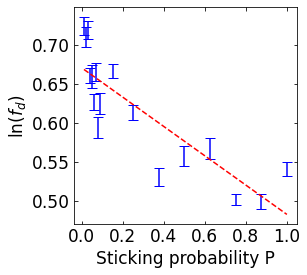

In [101]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(4,4)) 
font = 17

ax.set_xlabel("Sticking probability P", fontsize=font)
ax.set_ylabel("ln$(f_d)$", fontsize=font)

plt.xticks(fontsize=font)                 
plt.yticks(fontsize=font) 
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True) 

#ax.set_xscale('log')

ax.errorbar(t, np.log(fd), xerr=None, yerr=fd_err, color='blue', linestyle='', capsize=5)
#ax.errorbar(probs, fd, xerr=None, yerr=fd_err, color='blue', linestyle='', capsize=5)


#plot line of best fit
popt, pcov = curve_fit(best_fit, t, np.log(fd))
grad = popt[0]
grad_err = np.sqrt(np.diag(pcov))[0]

x_data = np.linspace(min(t), 1, 100)

# Define the formatter function
def decimal_formatter(x, pos):
    return f"{x*100:.1f}"

ax.plot(x_data, best_fit(x_data, *popt), color='red', linestyle='--', label=f"Gradient = {grad:.2f} $\pm$ {grad_err:.2f}")

print(f"Gradient = {grad:.2f} $\pm$ {grad_err:.2f}")
print(f"Intercept = {popt[1]:.2f} $\pm$ {np.sqrt(np.diag(pcov))[1]:.2f}")



# Set the formatter for the x-axis
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(decimal_formatter))

#plt.savefig('figures/fracdim_stick.png')
plt.show()


Fractal dimension = 2.06318006205442±0.011388830361741159


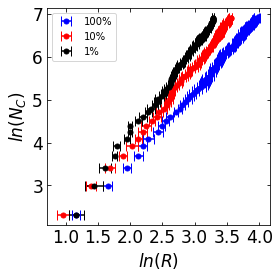

In [76]:
#plotting

fig, ax = plt.subplots(figsize=(4,4))  

font = 17

#graph formatting
#ax.set_xlabel("Fractal size / logarithmic", fontsize=font)
#ax.set_ylabel("Particle count / logarithmic", fontsize=font)

ax.set_xlabel("$ln(R)$", fontsize=font)
ax.set_ylabel("$ln(N_C)$", fontsize=font)

plt.xticks(fontsize=font)                 
plt.yticks(fontsize=font) 
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True) 

#calculating fractal dimension
popt, pcov = curve_fit(best_fit, p001_ln_clusterRadius, p001_ln_numParticles)
fracdim = popt[0]    
fracdim_err = np.sqrt(np.diag(pcov))[0]

print(f"Fractal dimension = {fracdim}±{fracdim_err}")

ax.errorbar(p1_ln_clusterRadius, p1_ln_numParticles, marker='o', markersize=5, yerr=None, xerr=p1_clusterRadius_err, color='blue', linestyle='', capsize=5, label='100%')
#ax.errorbar(p075_ln_clusterRadius, p075_ln_numParticles, yerr=None, xerr=p075_clusterRadius_err, color='red', linestyle='', capsize=5)

ax.errorbar(p009_ln_clusterRadius, p009_ln_numParticles, marker='o', markersize=5, yerr=None, xerr=p009_clusterRadius_err, color='red', linestyle='', capsize=5, label='10%')

ax.errorbar(p001_ln_clusterRadius, p001_ln_numParticles, marker='o', markersize=5, yerr=None, xerr=p001_clusterRadius_err, color='black', linestyle='', capsize=5, label='1%')

#ax.errorbar(oneK_log_raddii, oneK_log_numParticles, yerr=None, xerr=oneK_errors, color='red')

plt.legend()

plt.savefig('figures/fracdim_stick2')
plt.show()
